In [3]:
import pandas as pd
import numpy as np
!pip install pycmap
import pycmap
import plotly.express as px


import matplotlib.pyplot as plt

import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install cartopy
import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

Defaulting to user installation because normal site-packages is not writeable


In [5]:
key = "16065440-182a-11ed-a38a-6594a3860394"
api = pycmap.API(token=key)       # call api using your unique API key

In [6]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')
# HOT_bottle.keys()

count_null = []
for i in range(0, 67):
    col_name = HOT_bottle.keys()[i]
    count_null.append({col_name: HOT_bottle[col_name].isna().sum()})
# count_null

In [7]:
HOT_bottle.head()

,botid_HOT,time,date_time,pressure_ctd_bottle_hot,potential_temperature_ctd_bottle_hot,potential_density_ctd_bottle_hot,temperature_ctd_bottle_hot,salinity_ctd_bottle_hot,oxygen_ctd_bottle_hot,salinity_bottle_hot,...,pe4_bottle_hot,pe5_bottle_hot,pe10_bottle_hot,p15n_bottle_hot,PP_l12_bottle_hot,PP_d12_bottle_hot,NO2_bottle_hot,lat,lon,depth
0,10200312,1988-10-31T00:00:00,15704.0,4.7,26.2868,23.122,26.2879,35.2344,224.6,35.2450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,4.7
1,10200311,1988-10-31T00:00:00,15529.0,39.4,26.1785,23.149,26.1874,35.2253,219.5,35.2368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,39.4
2,10200310,1988-10-31T00:00:00,15401.0,99.4,21.7782,24.468,21.7978,35.2462,218.0,35.2578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,99.4
3,10200309,1988-10-31T00:00:00,15220.0,150.3,19.3937,24.989,19.4209,35.0890,201.9,35.0989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,150.3
4,10200308,1988-10-31T00:00:00,15059.0,191.8,17.6737,25.292,17.7063,34.9198,214.4,34.9293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,191.8


In [8]:
hot=HOT_bottle[['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot','salinity_ctd_bottle_hot','PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot','chl_bottle_hot','depth' ]]
hot=hot[hot.depth<300].dropna() # use the depth only in the top 300 meters. 

hot = hot.reset_index(drop=True)
print(hot.columns)
print(hot.shape)

Index(['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'PO4_bottle_hot', 'NO2_NO3_bottle_hot',
       'SiO4_bottle_hot', 'chl_bottle_hot', 'depth'],
      dtype='object')
(2383, 8)


In [9]:
hot.head(5)

,oxygen_ctd_bottle_hot,potential_temperature_ctd_bottle_hot,salinity_ctd_bottle_hot,PO4_bottle_hot,NO2_NO3_bottle_hot,SiO4_bottle_hot,chl_bottle_hot,depth
0,209.0,25.6074,34.9874,0.09,0.05,1.03,0.19,21.2
1,213.8,25.5869,34.9908,0.08,0.07,0.05,0.18,46.2
2,211.3,25.4512,34.9960,0.08,0.05,1.03,0.38,71.1
3,205.5,23.5445,35.0740,0.12,0.21,1.03,0.27,97.9
4,201.0,22.3731,35.1547,0.18,0.72,2.01,0.17,122.9


<AxesSubplot:>

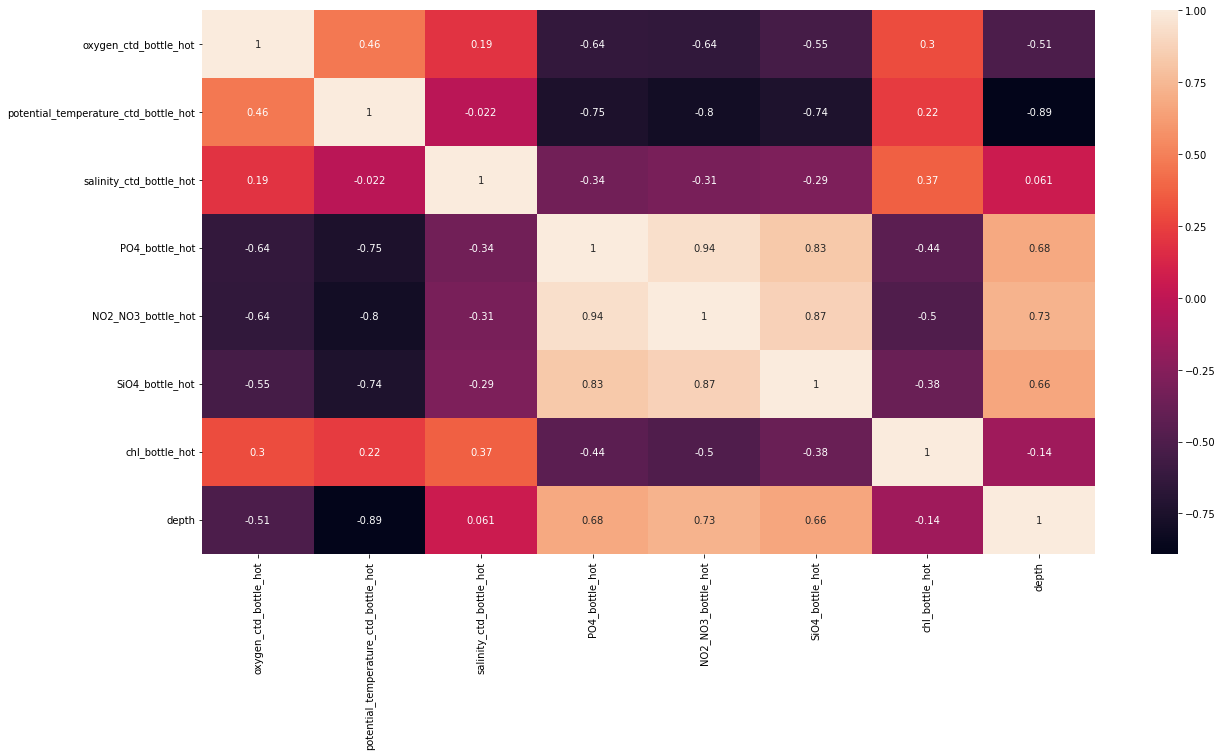

In [10]:
plt.figure(figsize=(20,10)) 
sns.heatmap(hot.corr(), annot=True) 

In [11]:
# sns.pairplot(hot, vars=['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot',
#        'salinity_ctd_bottle_hot', 'PO4_bottle_hot', 'NO2_NO3_bottle_hot',
#        'SiO4_bottle_hot', 'chl_bottle_hot', 'depth'])

In [20]:
def corrX_orig(df, cut = 0.85) :
        
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    drop = list()

        
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
		# Else: drop(row)
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(df.columns[[item for item in drop_set]])
    
    return(dropcols_names)

In [21]:
hot_drop = corrX_orig(hot)
hot_drop

/tmp/ipykernel_2716/2740345809.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))


['potential_temperature_ctd_bottle_hot', 'NO2_NO3_bottle_hot']

In [23]:
hot_new = hot.drop(['potential_temperature_ctd_bottle_hot', 'NO2_NO3_bottle_hot'], axis = 1)
hot_new.head()

,oxygen_ctd_bottle_hot,salinity_ctd_bottle_hot,PO4_bottle_hot,SiO4_bottle_hot,chl_bottle_hot,depth
0,209.0,34.9874,0.09,1.03,0.19,21.2
1,213.8,34.9908,0.08,0.05,0.18,46.2
2,211.3,34.9960,0.08,1.03,0.38,71.1
3,205.5,35.0740,0.12,1.03,0.27,97.9
4,201.0,35.1547,0.18,2.01,0.17,122.9


In [29]:
X_hotnew = hot_new.drop(['chl_bottle_hot'], axis=1)
y_hotnew = hot_new['chl_bottle_hot']

In [30]:
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X_hotnew, y_hotnew, test_size=0.2, random_state=13)

In [32]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#calculate RMSE
pred = regr.predict(X_test)
pred_rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Root Mean Square Error: " + str(pred_rmse))

Root Mean Square Error: 0.07326015880454899


In [37]:
np.std(hot['chl_bottle_hot'])

0.08542253201079253

### Compare with does not drop that two columns

In [33]:
X_hot = hot.drop(['chl_bottle_hot'], axis=1)
y_hot = hot['chl_bottle_hot']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_hot, y_hot, test_size=0.2, random_state=13)

In [36]:
regr_orginal = LinearRegression()
regr_orginal.fit(X_train, y_train)

#calculate RMSE
pred = regr_orginal.predict(X_test)
pred_rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Root Mean Square Error: " + str(pred_rmse))

Root Mean Square Error: 0.06796271984751259
